# Load of data 

In [237]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [238]:
airbnb_data = pd.read_csv("/Users/saracarcamo/Documents/KeepCoding/Practicas/Machine_learning/airbnb-listings-extract.csv", delimiter=";") # Load .csv file with ";" delimiter
print(airbnb_data.shape)
pd.set_option('display.max_columns', None)
airbnb_data.head(5).T 

(14780, 89)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
Summary,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Space,This loft has a spectacular view of the hills ...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",You wake up to the sun rising over Barcelona's...,"License: HUTB-005313 Charming apartment, locat..."
Description,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,This neighborhood is located in the hills west...,Plaza Cataluña Catalonia Square is the large...,Plaza Cataluña Catalonia Square is the large...,We're right in the heart of the chic L'Eixampl...,NaN


There are many of the columns of the data frame that won't be neccesary for the model because they don't have special relevance to estimate the price of the airbnb, so only "apparent" factors will be selected from the raw data.

In [239]:
#column_names = airbnb_data.columns
#print(column_names)

# Remove columns that we think won't have an effect with the price of the property, such as information linked to the host.
airbnb_data = airbnb_data.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Country Code', 'Weekly Price',
       'Monthly Price', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'First Review', 'Last Review', 'Review Scores Accuracy',
       'License', 'Jurisdiction Names', 'Calculated host listings count'], axis =1)

print(airbnb_data.shape)
airbnb_data.head(5).T 

(14780, 38)


,0,1,2,3,4
Neighbourhood,NaN,NaN,NaN,NaN,L'Antiga Esquerra de l'Eixample
Neighbourhood Cleansed,78733,la Dreta de l'Eixample,la Dreta de l'Eixample,la Dreta de l'Eixample,l'Antiga Esquerra de l'Eixample
Neighbourhood Group Cleansed,NaN,Eixample,Eixample,Eixample,Eixample
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
State,TX,Barcelona,Barcelona,Barcelona,Catalunya
Zipcode,78733,08010,08008,08009,08036
Market,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Smart Location,"Austin, TX","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain"
Country,United States,Spain,Spain,Spain,Spain
Latitude,30.337361,41.389683,41.393035,41.396967,41.388685


Now we have a dataframe with 38 columns or characteristics of the property, believed to be relevant for the model. Some of them will be sorted out and other selected for the final model, based on further exploratory analysis of data.

# Preparing data for first processing

Before doing anything else with the data, It has to be divided in train and test sets to ensure that no further decisions on the data and model are based on any of the characteristics of the test dataset.

In [240]:
from sklearn.model_selection import train_test_split

#full_data = pd.read_csv("airbnb-listings-extract.csv", delimiter=";")
train, test = train_test_split(airbnb_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensions of training dataset are: {train.shape}')
print(f'Dimensions of test dataset are: {test.shape}')

# save the divided sets into new .csv files
train.to_csv('airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('airbnb_test.csv', sep=';', decimal='.', index=False)

# Now we load ONLY the dataset TRAIN to continue with our model selection

train_data = pd.read_csv("airbnb_train.csv", sep=';')
#pd.set_option('display.max_columns', None)
train_data.head(5).T

Dimensions of training dataset are: (11824, 38)
Dimensions of test dataset are: (2956, 38)


,0,1,2,3,4
Neighbourhood,Jerónimos,NaN,Carabanchel,NaN,Gaztambide
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
City,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28
Zipcode,28014,28012,28025,28012,28015
Market,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"
Country,Spain,Spain,Spain,Spain,Spain
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631


# Exploratory Data Analysis


In [241]:
#pd.set_option('display.max_columns', None)
airbnb_data.describe()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
count,14780.000000,14780.000000,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,14763.000000,6256.000000,8687.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,11476.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,11618.000000
mean,40.497626,-3.858041,3.277808,1.281732,1.343816,2.04426,390.456522,73.561471,189.226822,31.805341,1.589986,7.690460,3.050474,945.168742,22.632273,91.697978,9.328883,9.621778,9.647033,9.532168,9.218201,1.870014
std,4.641387,14.123146,2.097291,0.658517,0.900078,1.61277,637.134930,72.062050,115.151070,30.878599,1.182550,12.971352,12.266517,8439.321218,38.290244,8.989101,0.989933,0.802736,0.767116,0.774527,0.950578,1.867550
min,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.00000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.020000
25%,40.409726,-3.707604,2.000000,1.000000,1.000000,1.00000,0.000000,34.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.450000
50%,40.419466,-3.700785,3.000000,1.000000,1.000000,2.00000,98.500000,55.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.200000
75%,40.430916,-3.684057,4.000000,1.000000,2.000000,2.00000,646.000000,86.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.780000
max,55.966912,153.371427,16.000000,8.000000,10.000000,16.00000,6997.000000,999.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,17.210000


In [242]:

train_data.isnull().sum()


Neighbourhood                    4159
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      818
City                                4
State                             119
Zipcode                           398
Market                             44
Smart Location                      0
Country                             1
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          44
Bedrooms                           20
Beds                               37
Bed Type                            0
Amenities                         141
Square Feet                     11350
Price                              15
Security Deposit                 6772
Cleaning Fee                     4850
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nigh

- Between 'Neighbourhood' and 'Neighbourhood Cleansed', provide the same imformation except that Neighbourhood has null values, so we are goin to drop that columns and only use Neighbourhood.
- 'Market' is also redundant with City, so we will drop it and only use City for the model.
- 'Bathrooms', 'Beds' and 'Bedrooms' have some NA values, the average will be inputted to these.
- **Problem**; The number of missing values for Square Feet is very high but the correlation with Price could be relevant.
- The rest of variables will stay as they are.

In [243]:
# Drop columns that have repeated information
train_data = train_data.drop(['Neighbourhood', 'Market'], axis=1)
# Input mean values in columns 'Bedrooms', 'Beds' and 'Bathrooms'
train_data['Bedrooms'] = train_data['Bedrooms'].fillna(train_data['Bedrooms'].mean())
train_data['Bathrooms'] = train_data['Bathrooms'].fillna(train_data['Bathrooms'].mean())
train_data['Beds'] = train_data['Beds'].fillna(train_data['Beds'].mean())
# Check the columns removal and NA imputation.
train_data.shape
train_data.isnull().sum()

Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      818
City                                4
State                             119
Zipcode                           398
Smart Location                      0
Country                             1
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                           0
Bedrooms                            0
Beds                                0
Bed Type                            0
Amenities                         141
Square Feet                     11350
Price                              15
Security Deposit                 6772
Cleaning Fee                     4850
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nights                      0
Number of Reviews                   0
Review Score

In [244]:
# Calculate the % of NA data in sqf columns
percentage_na_sqf = (train_data['Square Feet'].isnull().sum()/len(train_data))*100
print(f'El porcentage de NAs en Square Feet es de: {percentage_na_sqf}%')

El porcentage de NAs en Square Feet es de: 95.99120433017592%


**Categoric variables**

In [245]:
categoric = train_data.select_dtypes(include=['object', 'string'])

categoric.head(5).T

,0,1,2,3,4
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
City,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28
Zipcode,28014,28012,28025,28012,28015
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"
Country,Spain,Spain,Spain,Spain,Spain
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed


In [246]:
categoric_list = train_data.select_dtypes(include=['object', 'string']).columns.tolist()
print(categoric_list)

['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Smart Location', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy', 'Geolocation', 'Features']


Exploring data from categoric variables.

In [247]:
columnas = ['City', 'State', 'Country']
unicos_por_columna = {col: train_data[col].unique().tolist() for col in columnas}

print(unicos_por_columna)

{'City': ['Madrid', 'Illetes', 'Etterbeek', 'Palma', 'Betlem', 'Paris', '马德里', 'Rome', 'Bondi', 'Seattle', 'Los Angeles', 'Sutton', 'Barcelona', 'Amsterdam', 'Dublin', 'Berlin', 'Santa Margalida', 'Petra', 'Pasadena', 'London', 'Can Picafort', 'Santa Maria del Camí', 'Llucmajor', 'København', 'Brooklyn', 'Darlinghurst', 'Sant Llorenç des Cardassar', 'Washington', 'Edinburgh', 'Chicago', 'Chelsea, London', 'Sencelles', 'Valldemossa', 'New York', 'Manacor', 'Roma', 'Vancouver', 'Son Servera', 'Madrid, Comunidad de Madrid, ES', 'Antwerpen', 'Palma de Mallorca', 'Sóller', 'Wien', 'Campanet', 'Denver', 'Venice', 'Enmore', 'Frederiksberg', 'las matas  madrid', 'Vienna', 'Can Pastilla', 'Selva', 'Illes Balears', 'Potts Point', 'Melbourne', 'Pollensa', 'Toronto', 'Delicias-Madrid', 'Llubí', 'Santanyí', 'Binissalem', 'Algaida', 'Pozuelo de Alarcón', 'Alcúdia', 'San Francisco', 'Cala Ratjada', 'Deià', 'Madrid, Comunidad de Madrid, ESPANA', 'Surry Hills', 'Bruxelles', 'Sant Joan', 'Dorroughby', '

In [248]:
columns = train_data['Smart Location'].unique()
columns

array(['Madrid, Spain', 'Illetes, Spain', 'Etterbeek, Belgium',
       'Palma, Spain', 'Betlem, Spain', 'Paris, France', '马德里, Spain',
       'Rome, Italy', 'Bondi, Australia', 'Seattle, WA',
       'Los Angeles, CA', 'Sutton, United Kingdom', 'Barcelona, Spain',
       'Amsterdam, Netherlands', 'Dublin, Ireland', 'Berlin, Germany',
       'Santa Margalida, Spain', 'Petra, Spain', 'Pasadena, CA',
       'London, United Kingdom', 'Can Picafort, Spain',
       'Santa Maria del Camí, Spain', 'Llucmajor, Spain',
       'København, Denmark', 'Brooklyn , NY', 'Darlinghurst, Australia',
       'Sant Llorenç des Cardassar, Spain', 'Washington, DC',
       'Edinburgh, United Kingdom', 'Chicago, IL',
       'Chelsea, London, United Kingdom', 'Sencelles, Spain',
       'Valldemossa, Spain', 'New York, NY', 'Manacor, Spain',
       'Roma, Italy', 'Vancouver, Canada', 'Brooklyn, NY',
       'Son Servera, Spain', 'Madrid, Comunidad de Madrid, ES, Spain',
       'Antwerpen, Belgium', 'Palma de Mallor

In [249]:
Features = train_data['Features'].unique()
Features

array(['Host Has Profile Pic,Is Location Exact,Requires License',
       'Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable',
       'Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Instant Bookable',
       'Host Has Profile Pic,Requires License',
       'Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License',
       'Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License',
       'Host Is Superhost,Host Has Profile Pic,Requires License',
       'Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Require Guest Profile Picture,Require Guest Phone Verification',
       'Host Has Profile Pic,Is Location Exact,Requires License,Instant Bookable',
       'Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Require Guest Profile Picture,Require Guest Phone Verification',
       'Host Has Profile 

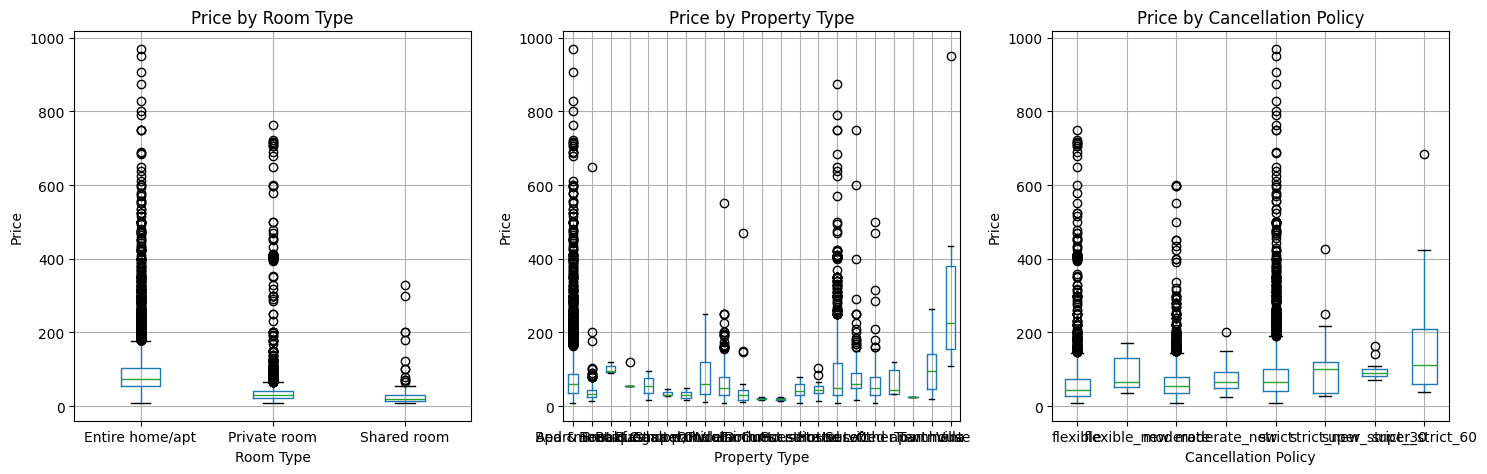

In [250]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot of Price vs Room Type
train.boxplot(column='Price', by='Room Type', ax=axes[0])
axes[0].set_title('Price by Room Type')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Price')

# Boxplot of Price vs Property Type
train.boxplot(column='Price', by='Property Type', ax=axes[1])
axes[1].set_title('Price by Property Type')
axes[1].set_xlabel('Property Type')
axes[1].set_ylabel('Price')

# Boxplot of Price vs Cancellation Policy
train.boxplot(column='Price', by='Cancellation Policy', ax=axes[2])
axes[2].set_title('Price by Cancellation Policy')
axes[2].set_xlabel('Cancellation Policy')
axes[2].set_ylabel('Price')

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

In [251]:
Property_type = train_data['Property Type'].unique()
Property_type

array(['Apartment', 'Loft', 'House', 'Bed & Breakfast', 'Dorm', 'Chalet',
       'Condominium', 'Guesthouse', 'Hostel', 'Other', 'Villa',
       'Boutique hotel', 'Camper/RV', 'Casa particular', 'Townhouse',
       'Serviced apartment', 'Guest suite', 'Boat', 'Tent', 'Earth House',
       'Bungalow'], dtype=object)

In [252]:
Room_type = train_data['Room Type'].unique() # OneHotEncoder
Room_type

array(['Entire home/apt', 'Shared room', 'Private room'], dtype=object)

In [253]:
# 1. Aplicar One-Hot Encoding a 'Room Type'
encoded_room_type = pd.get_dummies(
    train_data['Room Type'],  # Columna a codificar
    prefix='Room_Type',       # Prefijo para las nuevas columnas
    dtype=int                 # Convertir a 0 y 1 (int en lugar de bool)
)

# 2. Concatenar las nuevas columnas al DataFrame original
train_data = pd.concat([train_data, encoded_room_type], axis=1)

# 3. Eliminar la columna original 'Room Type' (opcional)
train_data.drop('Room Type', axis=1, inplace=True)

# 4. Verificar el resultado
print(train_data.filter(like='Room_Type').head())

# Guardar las columnas esperadas
expected_columns = ['Room_Type_Entire home/apt', 'Room_Type_Private room', 'Room_Type_Shared room']

# En datos nuevos (test), asegurar que tengan las mismas columnas
#test_data = pd.get_dummies(test_data, columns=['Room Type'], prefix='Room_Type')
#test_data = test_data.reindex(columns=expected_columns, fill_value=0)

   Room_Type_Entire home/apt  Room_Type_Private room  Room_Type_Shared room
0                          1                       0                      0
1                          1                       0                      0
2                          0                       0                      1
3                          0                       1                      0
4                          0                       1                      0


- 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed' => TargetEncoder for 'Neighbourhood Cleansed'
- 'city', 'State' and 'Country' => look at how many different values there are and if it's worth keeping => **There are many mistakes and mislabelings that 'Smart Location' has better labeled. Eliminate these two columns and keep 'Smart Location'
- **Eliminar** 'Zipcode', 'Geolocation', 'Features'
- Property Type => OneCode, too many categories -> **Eliminate**
- Room Type => OneHotEncoder

In [254]:
train_data = train_data.drop(['Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Country', 'Bed Type', 'Amenities', 'Cancellation Policy', 'Geolocation', 'Features'], axis=1)
train_data.head(5).T

,0,1,2,3,4
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Accommodates,4,4,1,2,2
Bathrooms,1.0,1.0,1.5,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0
Square Feet,NaN,NaN,NaN,NaN,NaN


In [255]:
!pip install category_encoders  # Si no lo tienes instalado

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [257]:

from category_encoders import TargetEncoder

# Eliminar NaN en 'Price'
train_data = train_data.dropna(subset=['Price'])

# Columnas a codificar
categorical_cols = ['Neighbourhood Cleansed', 'Smart Location', 'Property Type']

# Inicializar encoder
encoder = TargetEncoder(cols=categorical_cols)

# Aplicar transformación (maneja automáticamente la forma)
train_data = encoder.fit_transform(train_data, train_data['Price'])

# Verificar
print(train_data[categorical_cols].head())

   Neighbourhood Cleansed  Smart Location  Property Type
0              104.393275       66.217095      72.294431
1               85.710220       66.217095      72.294431
2               38.257332       66.217095      72.294431
3               60.707630       66.217095      72.294431
4               56.001978       66.217095      72.294431


In [205]:
train_data.head(5).T

,0,1,2,3,4
Neighbourhood Cleansed,104.393275,85.710220,38.257332,60.707630,56.001978
Smart Location,66.217095,66.217095,66.217095,66.217095,66.217095
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000
Beds,2.000000,2.000000,8.000000,1.000000,1.000000
Square Feet,NaN,NaN,NaN,NaN,NaN
Price,60.000000,50.000000,10.000000,30.000000,32.000000


In [206]:
from sklearn.preprocessing import TargetEncoder

train_data = train_data.dropna(subset=['Price'])
#X = train_data['Neighbourhood Cleansed']
#y = train_data['Price']

# Seleccionar las columnas categóricas a codificar
categorical_cols = ['Neighbourhood Cleansed', 'Smart Location']

# Crear el TargetEncoder con los parámetros deseados
encoder = TargetEncoder(cv=5, shuffle=True, random_state=42)

# Ajustar y transformar, luego asignar correctamente
encoded_data = encoder.fit_transform(
    train_data[categorical_cols], 
    train_data['Price']
)
train_data[categorical_cols] = pd.DataFrame(
    encoded_data, 
    columns=categorical_cols, 
    index=train_data.index
)

# Verificar resultados
print(train_data[categorical_cols].head())

# Si tienes datos de test, los transformarías (sin ajustar) así:
# test_data[categorical_cols] = encoder.transform(test_data[categorical_cols])

ValueError: Shape of passed values is (11809, 690), indices imply (11809, 2)

# **Outliers**

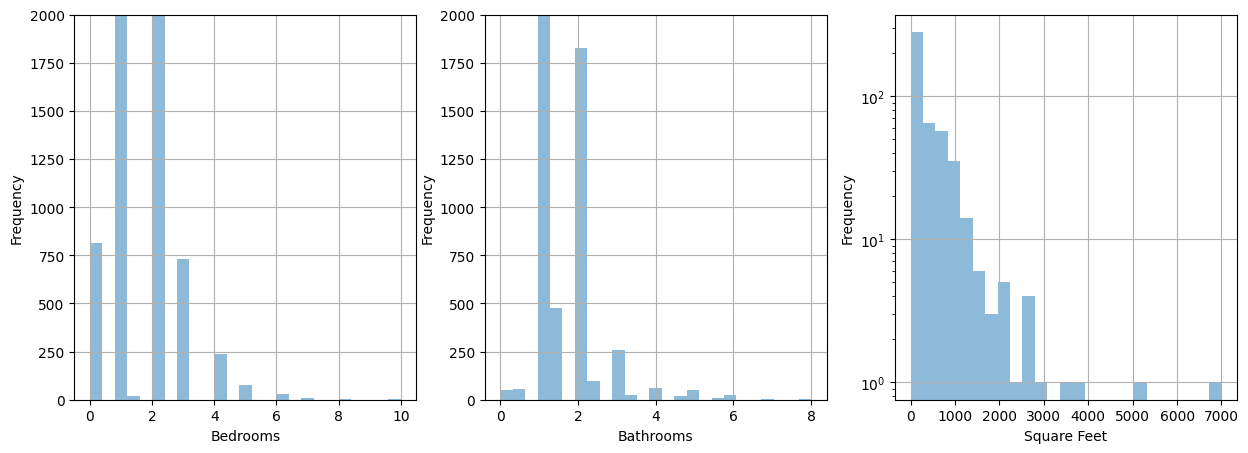

In [208]:
# Representar Square Feet, Bedrooms, Bathrooms
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
train_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 8000])
plt.ylim(0, 2000)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
train_data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 8000])
plt.ylim(0, 2000)
plt.xlabel('Bathrooms')

plt.subplot(1,3,3)
train_data['Square Feet'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Square Feet')


plt.show()

it looks like there are few properties with sqf. > 3000 that could be filtered out to make the train dataset more robust.

Número de registros con 'Square Feet' > 3000: 5


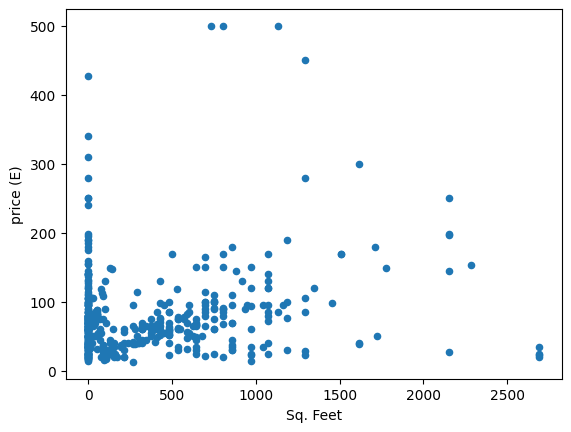

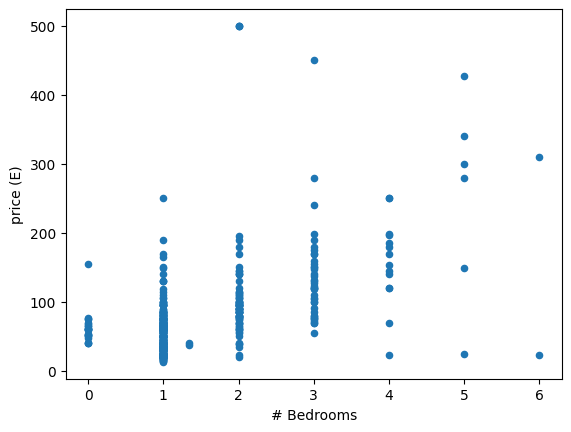

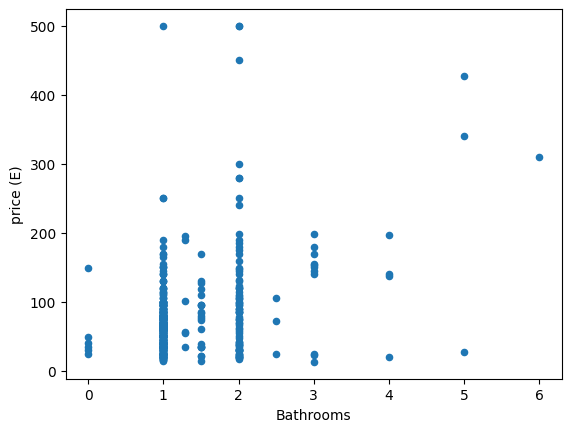

In [212]:
conteo = (train_data['Square Feet'] > 3000).sum()
print(f"Número de registros con 'Square Feet' > 3000: {conteo}")

filtered_great_sqf = train_data.query("`Square Feet` < 3000")

filtered_great_sqf.plot(kind = 'scatter', x='Square Feet', y='Price')
#plt.xlim(0, 3000)
plt.xlabel('Sq. Feet')
plt.ylabel('price (E)')
plt.show()

filtered_great_sqf.plot(kind = 'scatter', x='Bedrooms', y='Price')
plt.xlabel('# Bedrooms')
plt.ylabel('price (E)')
plt.show()

filtered_great_sqf.plot(kind = 'scatter', x='Bathrooms', y='Price')
plt.xlabel('Bathrooms')
plt.ylabel('price (E)')
plt.show()

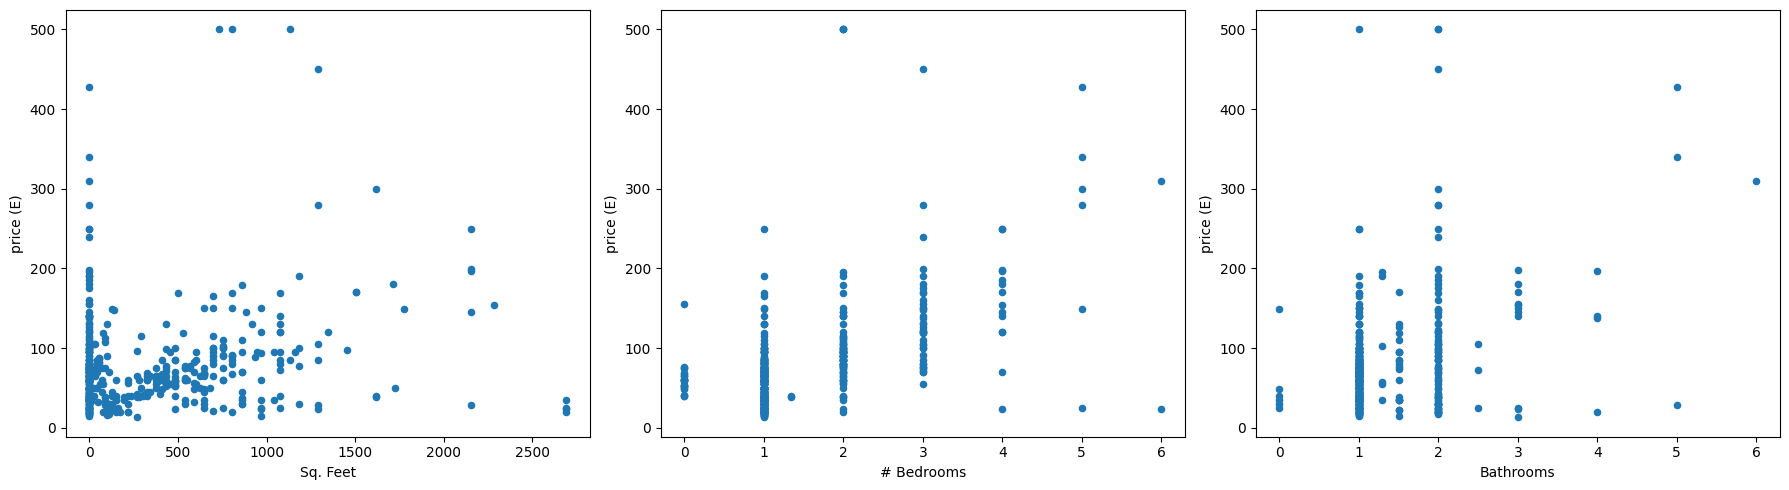

In [ ]:
# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns, adjust figure size as needed

# First plot: Square Feet vs Price
filtered_great_sqf.plot(kind='scatter', x='Square Feet', y='Price', ax=axes[0])
axes[0].set_xlabel('Sq. Feet')
axes[0].set_ylabel('price (€)')

# Second plot: Bedrooms vs Price
filtered_great_sqf.plot(kind='scatter', x='Bedrooms', y='Price', ax=axes[1])
axes[1].set_xlabel('# Bedrooms')
axes[1].set_ylabel('price (€)')

# Third plot: Bathrooms vs Price
filtered_great_sqf.plot(kind='scatter', x='Bathrooms', y='Price', ax=axes[2])
axes[2].set_xlabel('Bathrooms')
axes[2].set_ylabel('price (€)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

There are few properties with large sq. feet and higher number of bathrooms and bedrooms than the average. These few data points could be filtered out of the model to ensure better representation of the majority of the data in the model.
For examplo, the cut could be made at 4000 sq. feet.

plt.figure(figsize=(10, 6))

# Asignar colores únicos a cada vecindario
unique_neighbourhoods = train_data['Neighbourhood Cleansed'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_neighbourhoods))  # Paleta de colores

# Scatter plot
for i, neighbourhood in enumerate(unique_neighbourhoods):
    subset = train_data[train_data['Neighbourhood Cleansed'] == neighbourhood]
    plt.scatter(
        subset['Square Feet'], 
        subset['Price'], 
        color=colors(i), 
        label=neighbourhood,
        alpha=0.7  # Transparencia para solapamientos
    )

# Personalización
plt.xlabel('Square Feet')
plt.ylabel('Price (€)')
plt.title('Price vs Square Feet by Neighbourhood Cleansed')
plt.legend(title='Neighbourhood Cleansed', bbox_to_anchor=(1.05, 1))  # Leyenda fuera del gráfico
plt.grid(True)
plt.tight_layout()  # Ajustar layout para la leyenda
#plt.show()

In [220]:
train_data.head(5).T

,0,1,2,3,4
Neighbourhood Cleansed,104.393275,85.710220,38.257332,60.707630,56.001978
Smart Location,66.217095,66.217095,66.217095,66.217095,66.217095
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000
Beds,2.000000,2.000000,8.000000,1.000000,1.000000
Square Feet,NaN,NaN,NaN,NaN,NaN
Price,60.000000,50.000000,10.000000,30.000000,32.000000


## Correlations between variables

In [258]:
train_data.corr()

,Neighbourhood Cleansed,Smart Location,Latitude,Longitude,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room
Neighbourhood Cleansed,1.000000,0.278248,0.004692,0.026006,0.080311,0.220838,0.210602,0.166861,0.167874,0.154869,0.400384,0.152571,0.341898,0.103488,0.100658,0.019219,0.008341,0.010491,0.024353,0.033462,-0.008905,-0.011713,0.250006,0.015508,-0.021006,0.204307,-0.197276,-0.034997
Smart Location,0.278248,1.000000,0.035186,-0.019184,0.137869,0.049845,0.053927,0.071801,0.032668,0.172117,0.438952,0.142640,0.206941,-0.004102,-0.005676,-0.004382,-0.001156,-0.055072,0.001353,-0.010857,-0.014604,-0.007833,-0.035427,-0.006577,-0.097946,-0.018925,0.023133,-0.017020
Latitude,0.004692,0.035186,1.000000,-0.495981,-0.021760,0.005882,-0.005834,-0.010808,-0.000167,0.006588,-0.013221,0.028223,-0.024207,0.004832,0.018927,-0.003329,-0.000019,0.018791,-0.017796,-0.016368,-0.009402,-0.014993,-0.024298,-0.018147,0.009811,0.020517,-0.000782,-0.082859
Longitude,0.026006,-0.019184,-0.495981,1.000000,-0.014161,0.017722,0.026891,0.038943,0.033704,0.053986,0.004976,-0.028191,-0.035774,-0.007579,-0.051065,-0.004350,0.002381,-0.023831,-0.020193,-0.004120,-0.020058,-0.025554,-0.026383,-0.019725,-0.006614,0.007781,-0.017956,0.042209
Property Type,0.080311,0.137869,-0.021760,-0.014161,1.000000,0.117385,0.141372,0.164335,0.122728,0.161187,0.149494,0.059662,0.096091,0.068067,-0.016480,0.017366,0.005444,-0.047702,0.005660,0.001222,-0.005223,-0.002412,-0.029569,0.003229,-0.041016,0.054787,-0.040032,-0.063045
Accommodates,0.220838,0.049845,0.005882,0.017722,0.117385,1.000000,0.427726,0.720802,0.835198,0.444670,0.528380,0.189248,0.375182,0.565060,0.251381,0.006699,0.001253,0.058080,-0.048972,-0.015053,-0.069321,-0.051497,0.011086,-0.056342,0.019339,0.526961,-0.532371,0.007905
Bathrooms,0.210602,0.053927,-0.005834,0.026891,0.141372,0.427726,1.000000,0.516860,0.471358,0.524833,0.378682,0.210561,0.341115,0.239818,0.083678,0.030397,-0.003043,-0.075999,0.010423,0.008220,-0.044038,-0.042815,0.005039,-0.003908,-0.089634,0.023756,-0.023520,-0.001643
Bedrooms,0.166861,0.071801,-0.010808,0.038943,0.164335,0.720802,0.516860,1.000000,0.725570,0.455886,0.492171,0.225375,0.385019,0.435122,0.132640,0.020712,0.000291,-0.046009,0.013334,0.012081,-0.025932,-0.007974,-0.031712,-0.006473,-0.077266,0.267524,-0.258548,-0.044863
Beds,0.167874,0.032668,-0.000167,0.033704,0.122728,0.835198,0.471358,0.725570,1.000000,0.411792,0.437676,0.181212,0.339994,0.455995,0.185667,0.007286,0.001227,0.016877,-0.038619,-0.012787,-0.051283,-0.036098,-0.026069,-0.043804,-0.038508,0.325020,-0.351461,0.101210
Square Feet,0.154869,0.172117,0.006588,0.053986,0.161187,0.444670,0.524833,0.455886,0.411792,1.000000,0.450778,0.148767,0.247115,0.262642,0.141350,0.026634,0.040993,-0.100640,0.041192,0.023192,0.039649,0.016009,-0.020139,0.064075,-0.098307,0.074046,-0.067383,-0.036154


In [260]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


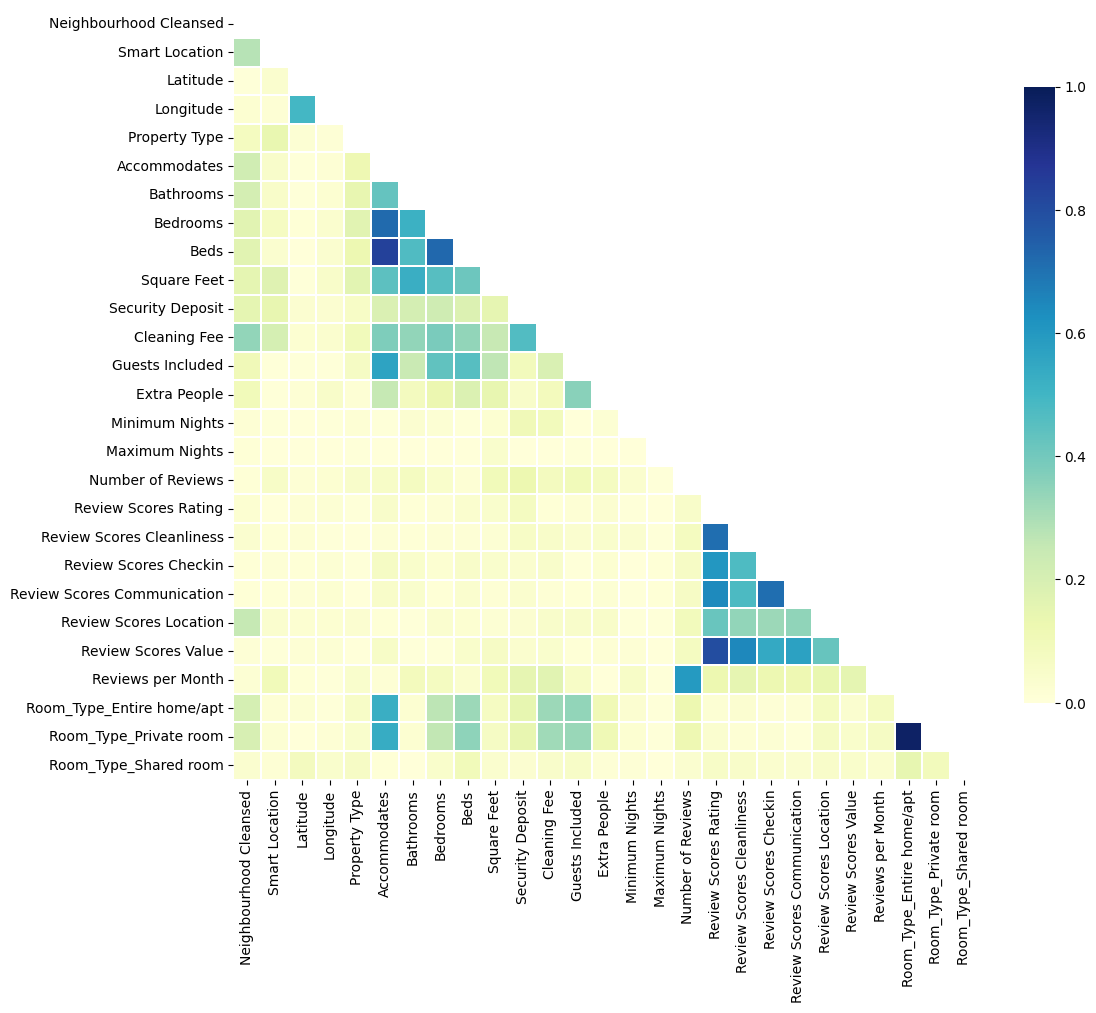

In [261]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(train_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

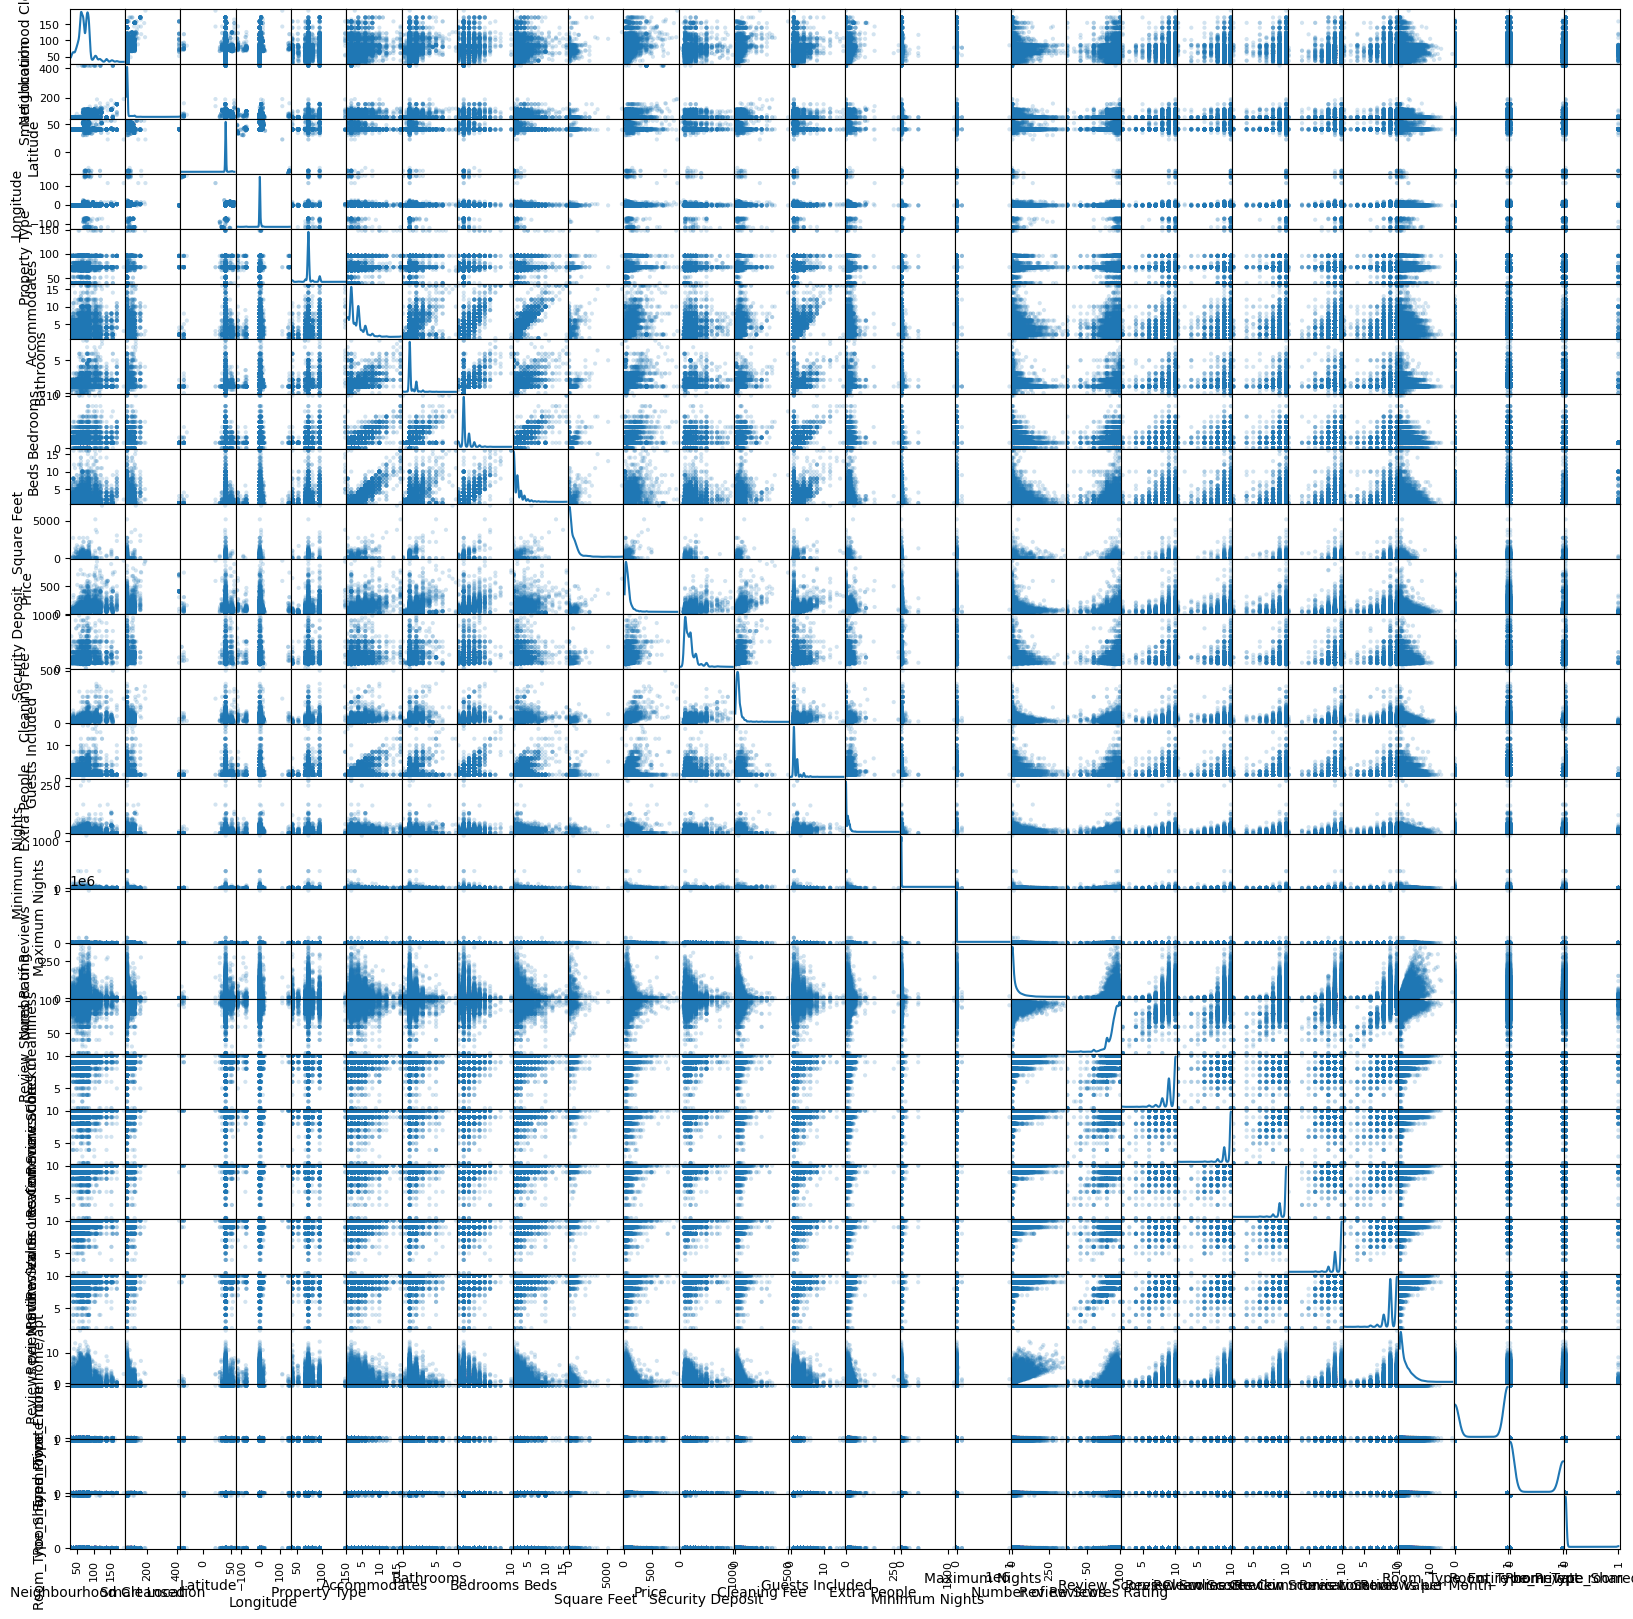

In [262]:
pd.plotting.scatter_matrix(train_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

# Generación de nuevas caracteristicas